# Les arbres

## 1. Exercice 1 
    
![Premier arbre](Images/exemple_graphe.png)

* Comment représenter cet arbre en Python avec les différents types de bases ?
* Ecrire une fonction qui donne la liste des arêtes ?


### Première solution - les dictionnaires

In [1]:
# On crée un dictionnaire dont la clé est le sommet à qui on associe la liste des sommets voisins
G = {"1":["2","5","4"],
     "2":["5","3","1"],
     "3":["2","5",],
     "4":["2","1"],
     "5":["1","2","3"]}

In [2]:
def aretes(G):
    liste_aretes = []
    for i,v in G.items():# je récupère la clé et les voisins (1 et 2,5,4)
        for s in v:
            if not({i,s} in liste_aretes): # éviter les doublons
                liste_aretes.append({i,s}) # ajoute l'arête en question
    return liste_aretes

# On peut passer par les ensembles pour supprimer les doublons

In [3]:
# Test de la fontion précédente
print("Les sommets (vertex)",G)
print("Les arêtes (edges)",aretes(G))

Les sommets (vertex) {'1': ['2', '5', '4'], '2': ['5', '3', '1'], '3': ['2', '5'], '4': ['2', '1'], '5': ['1', '2', '3']}
Les arêtes (edges) [{'2', '1'}, {'1', '5'}, {'4', '1'}, {'2', '5'}, {'2', '3'}, {'5', '3'}, {'4', '2'}]


### Compléments
#### Networkx

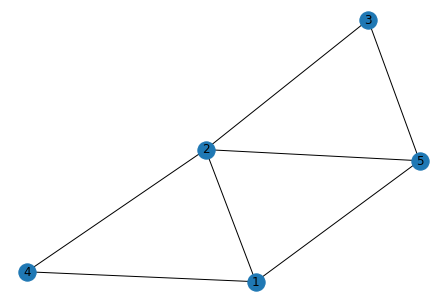

In [5]:
# représentation d'un graphe
from networkx import nx
import matplotlib.pyplot as plt

DG = nx.MultiGraph() # Attention il faut connaitre le type de  graphe voir le détail ci-dessous

DG.add_nodes_from(G.keys())
DG.add_edges_from(aretes(G))
nx.draw(DG,with_labels=True)
plt.show()

#### Liste des graphes


<div class="alert" style="background-color:#f4ecf7;border-left:1px solid #a569bd ">
    La librairie <b>networkx</b> utilise 4 classes différentes, selon le type de graphe :
<dl>
    <dt>Graph()</dt>
    <dd>Un graphe non orienté sans boucle, ni arc multiple. </dd>
    <dt>DiGraph()</dt>
    <dd>Un graphe orienté sans boucle, ni arc multiple. </dd>
    <dt>MultiGraph()</dt>
    <dd>Un graphe non orienté, pouvant avoir boucles et arcs multiples. </dd>
    <dt>MultiDiGraph()</dt>
    <dd>Un graphe orienté, pouvant avoir boucles et arcs multiples. </dd>
</dl>
</div>

#### Graphivz

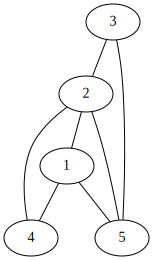

In [6]:
# représentation du graphe avec Graphivz
from graphviz import Graph

dessin = Graph()

for i in G.keys():
    dessin.node(i)
for i,j in aretes(G):
    dessin.edge(i,j)

dessin

### Deuxième solution - la matrice d'adjacence

Prenons l'ordre des entiers naturels

In [6]:
mat_g=[[0,1,0,1,1], # sommet 1
       [1,0,1,1,1], # sommet 2
       [0,1,0,0,1], # sommet 3
       [1,1,0,0,0], # sommet 4
       [1,1,1,0,0]]
print(mat_g)

[[0, 1, 0, 1, 1], [1, 0, 1, 1, 1], [0, 1, 0, 0, 1], [1, 1, 0, 0, 0], [1, 1, 1, 0, 0]]


## 2. Exercice 2
<img src="Images/park_path.svg" alt="Créer une image à partir d'un cas concrêt" width="300px" />

* Comment représenter ce graphe en Python?

In [7]:
# Désignons par E: entrée du parc, H: halte, B: le belvédère, C: l'étang aux canards, 
#               R: Casse-crôute et S: sortie du parc

# Il s'agit d'un multigraphe c'est dire, il existe plusieurs chemin pour aller d'un endroit à un autre.
# La représentation par matrice n'est pas possible, il faut utiliser les dictionnaires

G2={"E":["B","H","H","C"],
   "C":["E","R","R","H","H","S"],
   "H":["E","E","C","C","R","B"],
   "R":["H","B","C","C","S","S"],
   "S":["R","R","C","B"]}


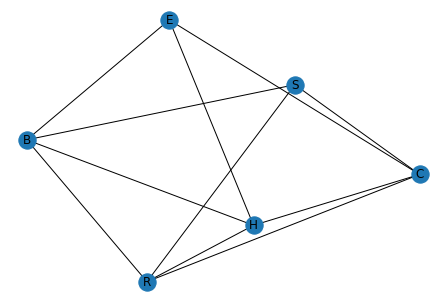

In [8]:
# Représentation du graphe
DG = nx.MultiGraph() # Attention il faut connaitre le type de  graphe voir le détail ci-dessous

DG.add_nodes_from(G2.keys())
DG.add_edges_from(aretes(G2))
nx.draw(DG,with_labels=True)
plt.show()

## Exercice 3

![graphe 2](Images/exemple_graphe2.png)

* Comment représenter cet arbre en Python avec les différents types de bases ?
* Ecrire une fonction qui donne la liste des arêtes ayant un poids donné ?

In [9]:
# matrice d'adjacences
# choix arbitraire des sommets A,B,C,D,E,F,G
Graphe = [[0, 2, 1, 0, 0, 0, 0], # sommet A
          [2, 0, 2, 1, 0, 0, 0],
          [1, 2, 0, 4, 3, 5, 0],
          [0, 1, 4, 0, 3, 6, 5],
          [0, 3, 3, 3, 0, 1, 0],
          [0, 0, 5, 6, 1, 0, 2],
          [0, 0, 0, 5, 0, 2, 0]
         ]

# dictionnaire
S = "ABCDEFG"
nb = len(S)
Graphe2 = {}

def matrice2dict(G,S):
    # Le graphe implanté avec un dictionnaire
    GD ={}
    for l in range(nb): # pour tous les sommets (on parcourt à l'aide de l'indice de S)
        GD[S[l]] = {}
        for c in range(nb):
            if G[l][c] != 0: #pour tous les coefficients non nuls de la matrice on ajoute le sommet
                                # avec le poids
                GD[S[l]][S[c]] = G[l][c]
    return GD

# en une seule ligne

#G3 = {S[l]:{S[c]: Graphe[l][c]}  for l in range(nb) for c in range(nb) if Graphe[l][c] !=0 }
G3 = matrice2dict(Graphe,S)
print(G3)

{'A': {'B': 2, 'C': 1}, 'B': {'A': 2, 'C': 2, 'D': 1}, 'C': {'A': 1, 'B': 2, 'D': 4, 'E': 3, 'F': 5}, 'D': {'B': 1, 'C': 4, 'E': 3, 'F': 6, 'G': 5}, 'E': {'B': 3, 'C': 3, 'D': 3, 'F': 1}, 'F': {'C': 5, 'D': 6, 'E': 1, 'G': 2}, 'G': {'D': 5, 'F': 2}}


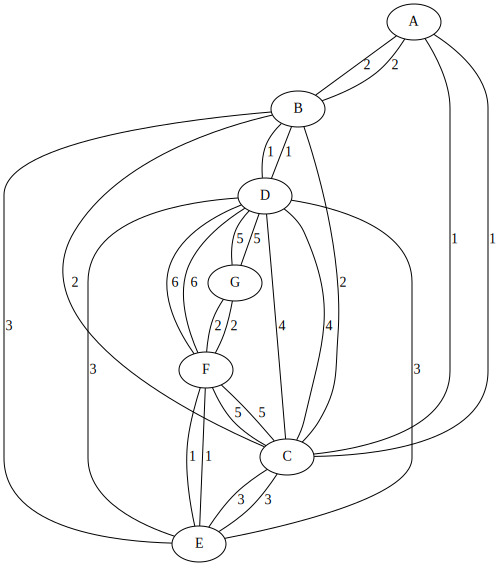

In [11]:
from graphviz import Graph

dessin2 = Graph()

for i in G3.keys():
    dessin2.node(i)
    
for i,voisins in G3.items():
    for v,p in voisins.items():
        dessin2.edge(i,v,str(p))

dessin2

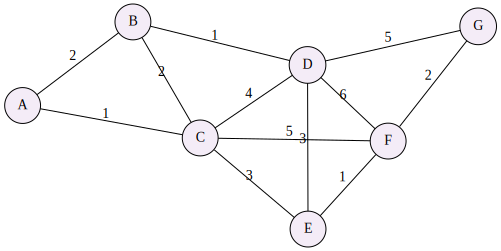

In [25]:
from graphviz import Graph

dessin3 = Graph(engine='sfdp')
dessin3.attr('node', shape='circle', style='filled', fillcolor='#f4ecf7', gradientangle='360', fontcolor='black')

S="ABCDEFG"
for i in S:
    dessin3.node(i)
    
for i in range(len(S)):
    for j in range(i,len(S)):
        if Graphe[i][j] != 0:
            dessin3.edge(S[i],S[j],str(Graphe[i][j]))

dessin3

/usr/lib/python3/dist-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


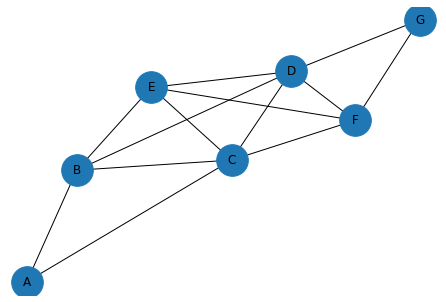

In [10]:
# fonction définissant les arêtes avec les pondérations
def aretes(G):
    liste_aretes = []
    for d,v in G.items():
        for f in v:
            liste_aretes.append((d,f,v[f]))
                
    return liste_aretes

DG = nx.Graph()
DG.add_nodes_from(G3.keys())
DG.add_weighted_edges_from(aretes(G3))
pos = nx.planar_layout(DG)
labels = nx.get_edge_attributes(DG,'weight')
# on dessine les poids sur les arêtes
#nx.draw_networkx_edge_labels(DG,pos,edge_labels=labels)
# on dessine le graphe
nx.draw(DG,with_labels=True,node_size=1000)
plt.show()

## Compléments personnels

In [13]:
import numpy as npy

A = npy.matrix([[2, 2, 7, 0, 0], [0, 2, 6, 3, 0], [0, 0, 0, 2, 1], [0, 0, 0, 0, 4],
                [4, 0, 0, 0, 0]])
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

# Set node labels to A, B, C, D, E
nx.set_node_attributes(G, {k: {'label': labels[k]} for k in labels.keys()})
nx.set_edge_attributes(G, {(e[0], e[1]): {'label': e[2]['weight']} for e in G.edges(data=True)})
D = nx.drawing.nx_agraph.to_agraph(G)

# Modify node fillcolor and edge color.
D.node_attr.update(color='blue', style='filled', fillcolor='yellow')
D.edge_attr.update(color='blue', arrowsize=1)
pos = D.layout('neato')
D.draw('Graph3.png')

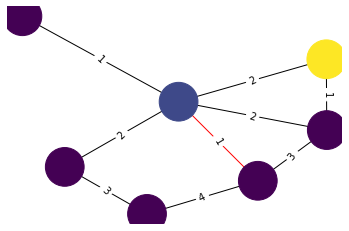

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.Graph()

G.add_edges_from([('A', 'B'),('C','D'),('G','D'),('B','A')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)


val_map = {'A': 1.0,'D': 0.5714285714285714,'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
pylab.show()